<a href="https://colab.research.google.com/github/SowmyaLR/neural-networks/blob/practise/ML/KNN/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -O 'fruit_dataset.txt' https://raw.githubusercontent.com/SowmyaLR/neural-networks/practise/ML/KNN/fruit_data_with_colors.txt

--2020-05-02 07:47:53--  https://raw.githubusercontent.com/SowmyaLR/neural-networks/practise/ML/KNN/fruit_data_with_colors.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2370 (2.3K) [text/plain]
Saving to: ‘fruit_dataset.txt’

fruit_dataset.txt   100%[===================>]   2.31K  --.-KB/s    in 0s      

2020-05-02 07:47:53 (34.5 MB/s) - ‘fruit_dataset.txt’ saved [2370/2370]



In [0]:
import pandas as pd

In [13]:
df = pd.read_table('fruit_dataset.txt')
df.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [7]:
df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4bd896b908>,
      dtype=object)

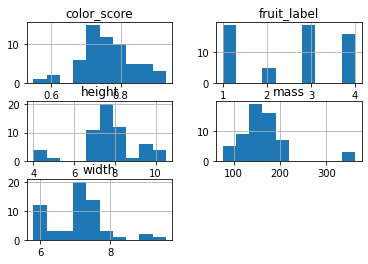

In [8]:
df.hist()

In [10]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


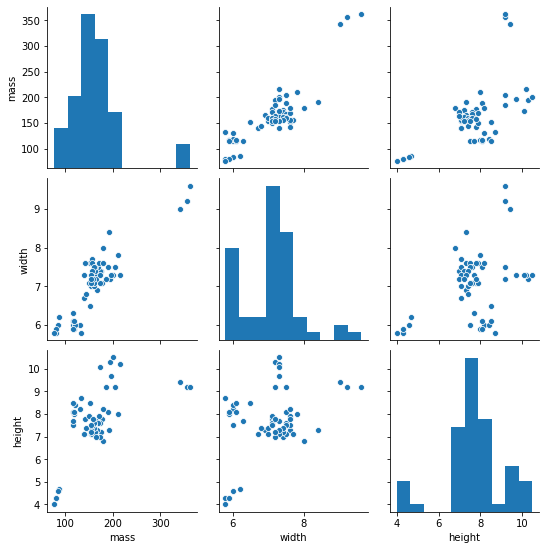

In [16]:
temp_df = df[[ 'mass', 'width', 'height']]



sns.pairplot(temp_df)

**Descriptive analysis:**

From the above graph we can find that there is a relationship between mass&width,mass&height. If width increases mass also increases positively. Similarly for height too.



In [22]:
#pd.pivot_table(df, index=['mass'])

temp_df.corr()

,mass,width,height
mass,1.000000,0.877687,0.609571
width,0.877687,1.000000,0.396848
height,0.609571,0.396848,1.000000


corr always gives a value between -1<=0<=1

If it is -ve it is -vely correlated
If it is +ve it is +vely correlated

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



In [0]:
features = [ 'mass', 'width', 'height', 'color_score']
X = df[features]
y = df[['fruit_label']]


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
k1 = KNeighborsClassifier(n_neighbors=1)
k3 = KNeighborsClassifier(n_neighbors=3)
k5 = KNeighborsClassifier(n_neighbors=5)

k1.fit(X_train, y_train)
k3.fit(X_train, y_train)
k5.fit(X_train, y_train)


print(f"K = 1 train score {k1.score(X_train, y_train)} test score {k1.score(X_test, y_test)}" )
print(f"K = 3 train score {k3.score(X_train, y_train)} test score {k1.score(X_test, y_test)}" )
print(f"K = 5 train score {k5.score(X_train, y_train)} test score {k1.score(X_test, y_test)}" )

K = 1 train score 1.0 test score 0.8
K = 3 train score 0.7727272727272727 test score 0.8
K = 5 train score 0.7045454545454546 test score 0.8


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [28]:
# Now data scaling is done

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


k1 = KNeighborsClassifier(n_neighbors=1)
k3 = KNeighborsClassifier(n_neighbors=3)
k5 = KNeighborsClassifier(n_neighbors=5)

k1.fit(X_train_scaled, y_train)
k3.fit(X_train_scaled, y_train)
k5.fit(X_train_scaled, y_train)


print(f"K = 1 train score {k1.score(X_train_scaled, y_train)} test score {k1.score(X_test_scaled, y_test)}" )
print(f"K = 3 train score {k3.score(X_train_scaled, y_train)} test score {k1.score(X_test_scaled, y_test)}" )
print(f"K = 5 train score {k5.score(X_train_scaled, y_train)} test score {k1.score(X_test_scaled, y_test)}" )

K = 1 train score 1.0 test score 0.9333333333333333
K = 3 train score 0.9772727272727273 test score 0.9333333333333333
K = 5 train score 0.9545454545454546 test score 0.9333333333333333


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


After scaling it is evident that test score is improved.